<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/CIFAR10_SVM_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 353s 226ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 226ms/step
Train Features Shape: (50000, 512)
Test Features Shape: (10000, 512)


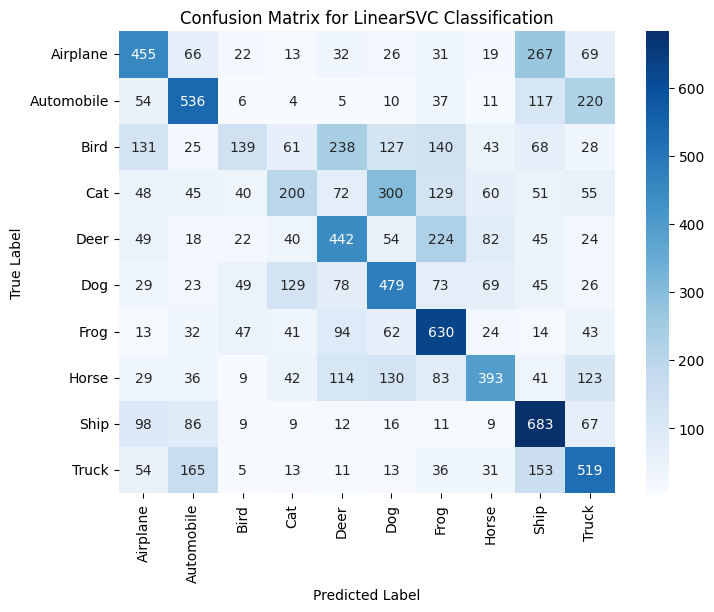

LinearSVC Accuracy: 0.4476


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization
from sklearn.svm import LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# CIFAR-10 클래스 이름 정의
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# CIFAR-10 데이터셋 로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# 데이터 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# CNN 모델 정의 (특성 추출기로 사용)
cnn_model = Sequential([
    Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
])

# CNN 특성 추출
X_train_features = cnn_model.predict(X_train)
X_test_features = cnn_model.predict(X_test)

print("Train Features Shape:", X_train_features.shape)
print("Test Features Shape:", X_test_features.shape)

# LinearSVC를 사용한 SVM 학습
svm = LinearSVC()
svm.fit(X_train_features, y_train.ravel())  # y_train.ravel()로 1D 형태로 변환

# SVM 예측
y_pred = svm.predict(X_test_features)

# 혼동 행렬 계산
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LinearSVC Classification')
plt.show()

# 정확도 출력
accuracy = metrics.accuracy_score(y_test, y_pred)
print("LinearSVC Accuracy:", accuracy)
